In [2]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd 

In [3]:
from sklearn.metrics import explained_variance_score

from sklearn.metrics import mean_squared_error

from sklearn.metrics import mean_absolute_error

from sklearn.metrics import r2_score

# PM25

In [4]:
Jan21PM25_predict_Valid_DF = pd.read_csv('Data_Processing_and_ARIMA/ARIMA_TS_TrainTestValid/Jan21PM25_predict_Valid.csv')
Jan21PM25_predict_Valid_df = pd.DataFrame(Jan21PM25_predict_Valid_DF.iloc[:,1])
#Jan21PM25_predict_Valid_df.head()

y_validPM25_DF = pd.read_csv('Data_Processing_and_ARIMA/ARIMA_TS_TrainTestValid/y_validPM25.csv')
y_validPM25_df = pd.DataFrame(y_validPM25_DF.iloc[:,1])
#y_validPM25_df.head()

####################################################################

y_trueARIMA = y_validPM25_df.to_numpy().flatten()
y_predARIMA = Jan21PM25_predict_Valid_df.to_numpy().flatten()
y_predARIMA = y_predARIMA[0:len(y_trueARIMA)]

arima_dict = {
    'explained_variance_score': explained_variance_score(y_trueARIMA, y_predARIMA),
    'mean_squared_error': mean_squared_error(y_trueARIMA, y_predARIMA),
    'mean_absolute_error': mean_absolute_error(y_trueARIMA, y_predARIMA),
    'r2_score': r2_score(y_trueARIMA, y_predARIMA)
    }

print('arima_dict', arima_dict)
print('#########################################\n')


####################################################################
####################################################################


TestyPM25_DF = pd.read_csv('ForecastLSTM/TestyPM25.csv')
#TestyPM25_DF.head()

Predicted_ValPM25_DF = pd.read_csv('ForecastLSTM/Predicted_ValPM25.csv')
#Predicted_ValPM25_DF.head()

####################################################################

y_trueLSTM = TestyPM25_DF.iloc[:, [1]].to_numpy().flatten()
y_predLSTM = Predicted_ValPM25_DF.iloc[:, [1]].to_numpy().flatten()

LSTM_dict = {
    'explained_variance_score': explained_variance_score(y_trueLSTM, y_predLSTM),
    'mean_squared_error': mean_squared_error(y_trueLSTM, y_predLSTM),
    'mean_absolute_error': mean_absolute_error(y_trueLSTM, y_predLSTM),
    'r2_score': r2_score(y_trueLSTM, y_predLSTM)
    }



print('LSTM_dict', LSTM_dict)
print('#########################################\n')
####################################################################
####################################################################
####################################################################

alpha_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
alpha_list

for alpha in alpha_list:
    y_ensemble = (alpha)*(y_predLSTM) + (1-alpha)*(y_predARIMA)

    LSTM_Arima_dict = {
        'explained_variance_score': explained_variance_score(y_trueLSTM, y_ensemble),
        'mean_squared_error': mean_squared_error(y_trueLSTM, y_ensemble),
        'mean_absolute_error': mean_absolute_error(y_trueLSTM, y_ensemble),
        'r2_score': r2_score(y_trueLSTM, y_ensemble)
        }

    print(LSTM_Arima_dict)
    print('#########################################')
print("######################")

print("for alpha=0.8")
LSTM_Arima_dict = {
    'explained_variance_score': explained_variance_score(y_trueLSTM, y_ensemble),
    'mean_squared_error': mean_squared_error(y_trueLSTM, y_ensemble),
    'mean_absolute_error': mean_absolute_error(y_trueLSTM, y_ensemble),
    'r2_score': r2_score(y_trueLSTM, y_ensemble)
    }

print(LSTM_Arima_dict)
    
alpha = 0.8
y_ensemble = (alpha)*(y_predLSTM) + (1-alpha)*(y_predARIMA)

TestyPM25_Value = pd.DataFrame(TestyPM25_DF.iloc[:,1])

Ensemble = pd.DataFrame(y_ensemble)
Ensemble.columns = ["Ensemble_Forecast_PM25_Value"]
TestyPM25_Value.columns = ["Real_Value"]
Ensemble_PM25 = TestyPM25_Value.join(Ensemble)
#Ensemble_PM25.plot(xlabel="Observation Number", ylabel= 'Pollution Level')



TestyPM25_DF = pd.read_csv('ForecastLSTM/TestyPM25.csv')
Predicted_ValPM25_DF = pd.read_csv('ForecastLSTM/Predicted_ValPM25.csv')


TestyPM25_Value = pd.DataFrame(TestyPM25_DF.iloc[:,1])
Predicted_ValPM25_Value = pd.DataFrame(Predicted_ValPM25_DF.iloc[:,1])

TestyPM25_Value.columns = ["Real_Value"]
Predicted_ValPM25_Value.columns = ["LSTM_Forecast_PM25_Value"]

LSTM_PM25 = TestyPM25_Value.join(Predicted_ValPM25_Value)
#LSTM_PM25.head()
#LSTM_PM25.plot(xlabel="Observation Number", ylabel= 'Pollution Level')





arima_dict {'explained_variance_score': 0.5937190404410153, 'mean_squared_error': 7145.553979993265, 'mean_absolute_error': 26.71603380974091, 'r2_score': 0.5937186146167059}
#########################################

LSTM_dict {'explained_variance_score': 0.6943846371059714, 'mean_squared_error': 5379.252192374268, 'mean_absolute_error': 26.26875972013937, 'r2_score': 0.694146872424019}
#########################################

{'explained_variance_score': 0.6066504282338633, 'mean_squared_error': 6918.192896089226, 'mean_absolute_error': 26.452154993740926, 'r2_score': 0.6066458944902346}
#########################################
{'explained_variance_score': 0.6189451875541887, 'mean_squared_error': 6702.10534666122, 'mean_absolute_error': 26.24216142820032, 'r2_score': 0.6189321845653639}
#########################################
{'explained_variance_score': 0.6306033184019912, 'mean_squared_error': 6497.291331709242, 'mean_absolute_error': 26.0712792599177, 'r2_score': 0.630577484

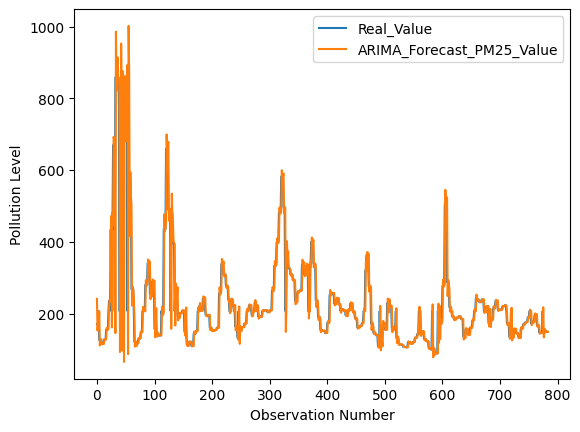

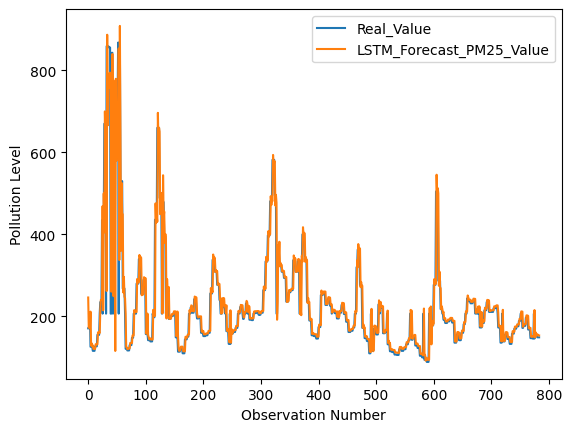

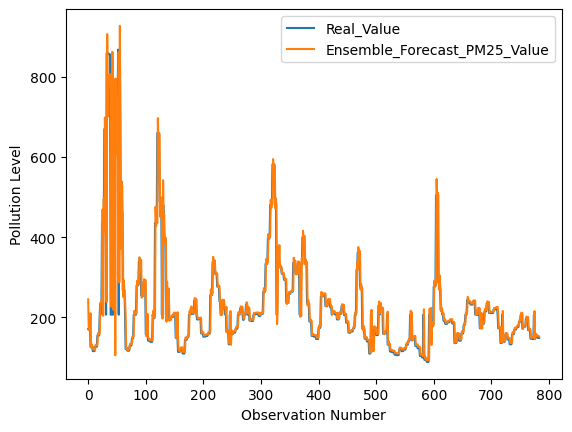

In [5]:
Jan21PM25_predict_Valid_df.columns = ['ARIMA_Forecast_PM25_Value']
ARIMA_PM25 = TestyPM25_Value.join(Jan21PM25_predict_Valid_df)
#LSTM_PM25.head()
fig_ARIMA_PM25 = ARIMA_PM25.plot(xlabel="Observation Number", ylabel= 'Pollution Level').figure
fig_ARIMA_PM25.savefig('ARIMA_PM25.jpeg')

fig_LSTM_PM25 = LSTM_PM25.plot(xlabel="Observation Number", ylabel= 'Pollution Level').figure
fig_LSTM_PM25.savefig('LSTM_PM25.jpeg')

fig_Ensemble_PM25 = Ensemble_PM25.plot(xlabel="Observation Number", ylabel= 'Pollution Level').figure
fig_Ensemble_PM25.savefig('Ensemble_PM25.jpeg')

# NO

In [6]:
Jan21NO_predict_Valid_DF = pd.read_csv('Data_Processing_and_ARIMA/ARIMA_TS_TrainTestValid/Jan21NO_predict_Valid.csv')
Jan21NO_predict_Valid_df = pd.DataFrame(Jan21NO_predict_Valid_DF.iloc[:,1])
#Jan21NO_predict_Valid_df.head()

y_validNO_DF = pd.read_csv('Data_Processing_and_ARIMA/ARIMA_TS_TrainTestValid/y_validNO.csv')
y_validNO_df = pd.DataFrame(y_validNO_DF.iloc[:,1])
#y_validNO_df.head()

####################################################################

y_trueARIMA = y_validNO_df.to_numpy().flatten()
y_predARIMA = Jan21NO_predict_Valid_df.to_numpy().flatten()
y_predARIMA = y_predARIMA[0:len(y_trueARIMA)]

arima_dict = {
    'explained_variance_score': explained_variance_score(y_trueARIMA, y_predARIMA),
    'mean_squared_error': mean_squared_error(y_trueARIMA, y_predARIMA),
    'mean_absolute_error': mean_absolute_error(y_trueARIMA, y_predARIMA),
    'r2_score': r2_score(y_trueARIMA, y_predARIMA)
    }

print('arima_dict', arima_dict)
print('#########################################\n')


####################################################################
####################################################################


TestyNO_DF = pd.read_csv('ForecastLSTM/TestyNO.csv')
#TestyNO_DF.head()

Predicted_ValNO_DF = pd.read_csv('ForecastLSTM/Predicted_ValNO.csv')
#Predicted_ValNO_DF.head()

####################################################################

y_trueLSTM = TestyNO_DF.iloc[:, [1]].to_numpy().flatten()
y_predLSTM = Predicted_ValNO_DF.iloc[:, [1]].to_numpy().flatten()

LSTM_dict = {
    'explained_variance_score': explained_variance_score(y_trueLSTM, y_predLSTM),
    'mean_squared_error': mean_squared_error(y_trueLSTM, y_predLSTM),
    'mean_absolute_error': mean_absolute_error(y_trueLSTM, y_predLSTM),
    'r2_score': r2_score(y_trueLSTM, y_predLSTM)
    }



print('LSTM_dict', LSTM_dict)
print('#########################################\n')
####################################################################
####################################################################
####################################################################

alpha_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
alpha_list

for alpha in alpha_list:
    y_ensemble = (alpha)*(y_predLSTM) + (1-alpha)*(y_predARIMA)

    LSTM_Arima_dict = {
        'explained_variance_score': explained_variance_score(y_trueLSTM, y_ensemble),
        'mean_squared_error': mean_squared_error(y_trueLSTM, y_ensemble),
        'mean_absolute_error': mean_absolute_error(y_trueLSTM, y_ensemble),
        'r2_score': r2_score(y_trueLSTM, y_ensemble)
        }

    print(LSTM_Arima_dict)
    print('#########################################')
print("######################")

print("for alpha = 0.95")

alpha = 0.95
y_ensemble = (alpha)*(y_predLSTM) + (1-alpha)*(y_predARIMA)

LSTM_Arima_dict = {
    'explained_variance_score': explained_variance_score(y_trueLSTM, y_ensemble),
    'mean_squared_error': mean_squared_error(y_trueLSTM, y_ensemble),
    'mean_absolute_error': mean_absolute_error(y_trueLSTM, y_ensemble),
    'r2_score': r2_score(y_trueLSTM, y_ensemble)
    }

print(LSTM_Arima_dict)

TestyNO_DF = pd.read_csv('ForecastLSTM/TestyNO.csv')
Predicted_ValNO_DF = pd.read_csv('ForecastLSTM/Predicted_ValNO.csv')

TestyNO_Value = pd.DataFrame(TestyNO_DF.iloc[:,1])
Predicted_ValNO_Value = pd.DataFrame(Predicted_ValNO_DF.iloc[:,1])

TestyNO_Value.columns = ["Real_Value"]
Predicted_ValNO_Value.columns = ["LSTM_Forecast_NO_Value"]

Ensemble = pd.DataFrame(y_ensemble)
Ensemble.columns = ["Ensemble_Forecast_NO_Value"]
TestyNO_Value.columns = ["Real_Value"]
Ensemble_NO = TestyNO_Value.join(Ensemble)
#Ensemble_NO.plot(xlabel="Observation Number", ylabel= 'Pollution Level')


LSTM_NO = TestyNO_Value.join(Predicted_ValNO_Value)
#LSTM_NO.head()
#LSTM_NO.plot(xlabel="Observation Number", ylabel= 'Pollution Level')

arima_dict {'explained_variance_score': 0.42286146367596833, 'mean_squared_error': 3747.9549258538646, 'mean_absolute_error': 24.080257123239424, 'r2_score': 0.4228614506330284}
#########################################

LSTM_dict {'explained_variance_score': 0.502810588505447, 'mean_squared_error': 3232.6575651938574, 'mean_absolute_error': 22.700271184713607, 'r2_score': 0.5022108497339774}
#########################################

{'explained_variance_score': 0.43826084571999, 'mean_squared_error': 3647.993080718295, 'mean_absolute_error': 23.76587085223844, 'r2_score': 0.4382543343349169}
#########################################
{'explained_variance_score': 0.4520147900837731, 'mean_squared_error': 3558.7939264870733, 'mean_absolute_error': 23.519817508025458, 'r2_score': 0.4519898971941847}
#########################################
{'explained_variance_score': 0.4641232967673177, 'mean_squared_error': 3480.3574631602005, 'mean_absolute_error': 23.309982358127748, 'r2_score': 0.4

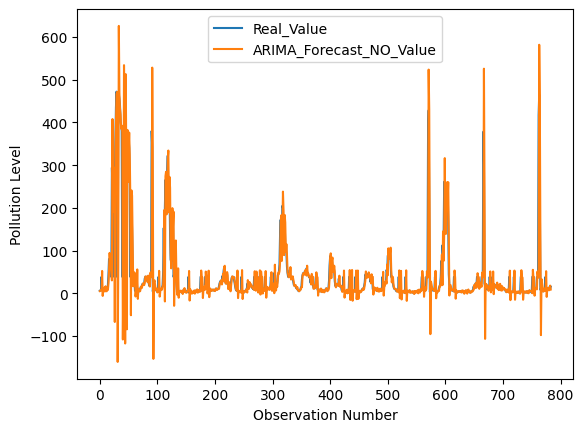

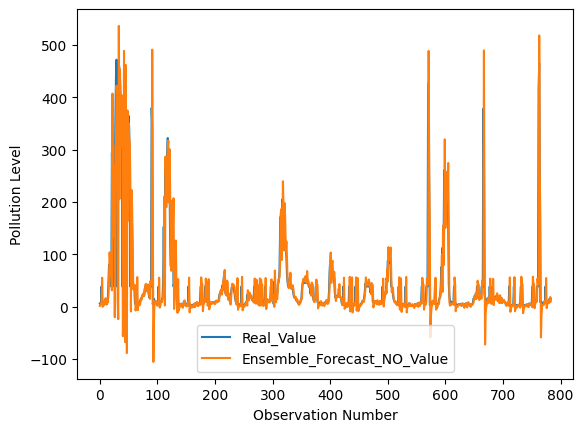

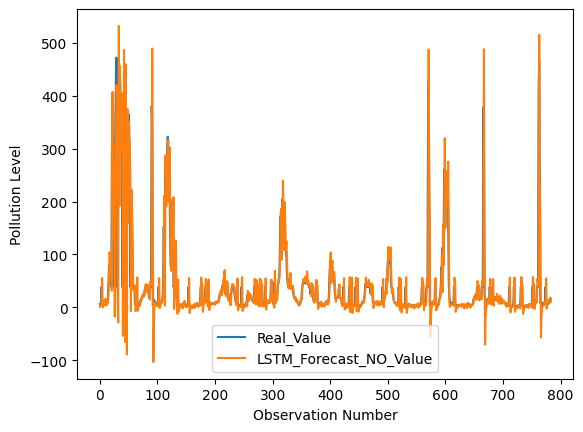

In [7]:
Jan21NO_predict_Valid_df.columns = ['ARIMA_Forecast_NO_Value']
ARIMA_NO = TestyNO_Value.join(Jan21NO_predict_Valid_df)

fig_ARIMA_NO = ARIMA_NO.plot(xlabel="Observation Number", ylabel= 'Pollution Level').figure
fig_ARIMA_NO.savefig('ARIMA_NO.jpeg')


fig_Ensemble_NO = Ensemble_NO.plot(xlabel="Observation Number", ylabel= 'Pollution Level').figure
fig_Ensemble_NO.savefig('Ensemble_NO.jpeg')

fig_LSTM_NO = LSTM_NO.plot(xlabel="Observation Number", ylabel= 'Pollution Level').figure
fig_LSTM_NO.savefig('LSTM_NO.jpeg')

# NOx

In [8]:
Jan21NOx_predict_Valid_DF = pd.read_csv('Data_Processing_and_ARIMA/ARIMA_TS_TrainTestValid/Jan21NOx_predict_Valid.csv')
Jan21NOx_predict_Valid_df = pd.DataFrame(Jan21NOx_predict_Valid_DF.iloc[:,1])
#Jan21NOx_predict_Valid_df.head()

y_validNOx_DF = pd.read_csv('Data_Processing_and_ARIMA/ARIMA_TS_TrainTestValid/y_validNOx.csv')
y_validNOx_df = pd.DataFrame(y_validNOx_DF.iloc[:,1])
#y_validNOx_df.head()

####################################################################

y_trueARIMA = y_validNOx_df.to_numpy().flatten()
y_predARIMA = Jan21NOx_predict_Valid_df.to_numpy().flatten()
y_predARIMA = y_predARIMA[0:len(y_trueARIMA)]

arima_dict = {
    'explained_variance_score': explained_variance_score(y_trueARIMA, y_predARIMA),
    'mean_squared_error': mean_squared_error(y_trueARIMA, y_predARIMA),
    'mean_absolute_error': mean_absolute_error(y_trueARIMA, y_predARIMA),
    'r2_score': r2_score(y_trueARIMA, y_predARIMA)
    }

print('arima_dict', arima_dict)
print('#########################################\n')


####################################################################
####################################################################


TestyNOx_DF = pd.read_csv('ForecastLSTM/TestyNOx.csv')
#TestyNOx_DF.head()

Predicted_ValNOx_DF = pd.read_csv('ForecastLSTM/Predicted_ValNOx.csv')
#Predicted_ValNOx_DF.head()

####################################################################

y_trueLSTM = TestyNOx_DF.iloc[:, [1]].to_numpy().flatten()
y_predLSTM = Predicted_ValNOx_DF.iloc[:, [1]].to_numpy().flatten()

LSTM_dict = {
    'explained_variance_score': explained_variance_score(y_trueLSTM, y_predLSTM),
    'mean_squared_error': mean_squared_error(y_trueLSTM, y_predLSTM),
    'mean_absolute_error': mean_absolute_error(y_trueLSTM, y_predLSTM),
    'r2_score': r2_score(y_trueLSTM, y_predLSTM)
    }



print('LSTM_dict', LSTM_dict)
print('#########################################\n')
####################################################################
####################################################################
####################################################################

alpha_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
alpha_list

for alpha in alpha_list:
    y_ensemble = (alpha)*(y_predLSTM) + (1-alpha)*(y_predARIMA)

    LSTM_Arima_dict = {
        'explained_variance_score': explained_variance_score(y_trueLSTM, y_ensemble),
        'mean_squared_error': mean_squared_error(y_trueLSTM, y_ensemble),
        'mean_absolute_error': mean_absolute_error(y_trueLSTM, y_ensemble),
        'r2_score': r2_score(y_trueLSTM, y_ensemble)
        }

    print(LSTM_Arima_dict)
    print('#########################################')
print("######################")

print('for alpha=0.8')
alpha = 0.8
y_ensemble = (alpha)*(y_predLSTM) + (1-alpha)*(y_predARIMA)

LSTM_Arima_dict = {
    'explained_variance_score': explained_variance_score(y_trueLSTM, y_ensemble),
    'mean_squared_error': mean_squared_error(y_trueLSTM, y_ensemble),
    'mean_absolute_error': mean_absolute_error(y_trueLSTM, y_ensemble),
    'r2_score': r2_score(y_trueLSTM, y_ensemble)
    }

print(LSTM_Arima_dict)

TestyNOx_DF = pd.read_csv('ForecastLSTM/TestyNOx.csv')
Predicted_ValNOx_DF = pd.read_csv('ForecastLSTM/Predicted_ValNOx.csv')


TestyNOx_Value = pd.DataFrame(TestyNOx_DF.iloc[:,1])
Predicted_ValNOx_Value = pd.DataFrame(Predicted_ValNOx_DF.iloc[:,1])

TestyNOx_Value.columns = ["Real_Value"]
Predicted_ValNOx_Value.columns = ["LSTM_Forecast_NOx_Value"]

Ensemble = pd.DataFrame(y_ensemble)
Ensemble.columns = ["Ensemble_Forecast_NOx_Value"]
TestyNOx_Value.columns = ["Real_Value"]
Ensemble_NOx = TestyNOx_Value.join(Ensemble)
#Ensemble_NOx.plot(xlabel="Observation Number", ylabel= 'Pollution Level')


LSTM_NOx = TestyNOx_Value.join(Predicted_ValNOx_Value)
#LSTM_NOx.head()
#LSTM_NOx.plot(xlabel="Observation Number", ylabel= 'Pollution Level')

arima_dict {'explained_variance_score': 0.5935395488437085, 'mean_squared_error': 2531.9259755299145, 'mean_absolute_error': 19.72692147394569, 'r2_score': 0.5935392421615426}
#########################################

LSTM_dict {'explained_variance_score': 0.6343386062842855, 'mean_squared_error': 2302.7702053317635, 'mean_absolute_error': 20.99395791260701, 'r2_score': 0.6303265846502193}
#########################################

{'explained_variance_score': 0.5989940133986331, 'mean_squared_error': 2498.1592398877583, 'mean_absolute_error': 19.67919073902513, 'r2_score': 0.5989599586799113}
#########################################
{'explained_variance_score': 0.6041430204400317, 'mean_squared_error': 2466.803872828344, 'mean_absolute_error': 19.70649831386313, 'r2_score': 0.6039935680272799}
#########################################
{'explained_variance_score': 0.6089865699679045, 'mean_squared_error': 2437.8598743516723, 'mean_absolute_error': 19.7650936692855, 'r2_score': 0.6086

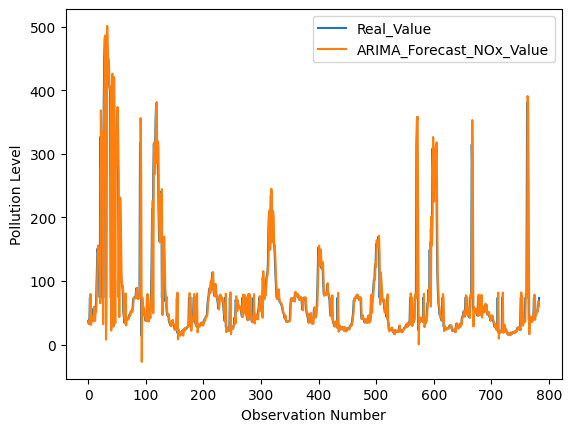

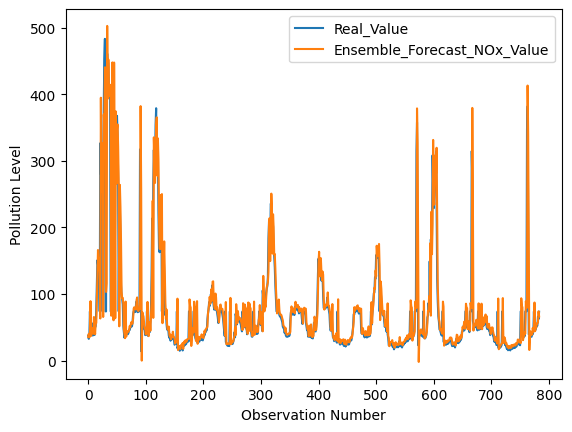

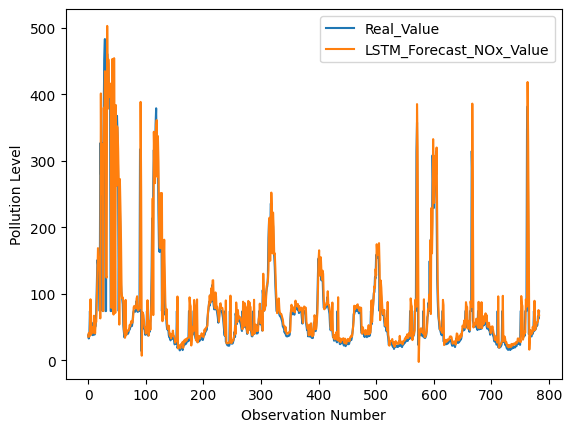

In [9]:
Jan21NOx_predict_Valid_df.columns = ['ARIMA_Forecast_NOx_Value']
ARIMA_NOx = TestyNOx_Value.join(Jan21NOx_predict_Valid_df)

fig_ARIMA_NOx = ARIMA_NOx.plot(xlabel="Observation Number", ylabel= 'Pollution Level').figure
fig_ARIMA_NOx.savefig('ARIMA_NOx.jpeg')

fig_Ensemble_NOx = Ensemble_NOx.plot(xlabel="Observation Number", ylabel= 'Pollution Level').figure
fig_Ensemble_NOx.savefig('Ensemble_NOx.jpeg')

fig_LSTM_NOx = LSTM_NOx.plot(xlabel="Observation Number", ylabel= 'Pollution Level').figure
fig_LSTM_NOx.savefig('LSTM_NOx.jpeg')

# SO2

In [10]:
Jan21SO2_predict_Valid_DF = pd.read_csv('Data_Processing_and_ARIMA/ARIMA_TS_TrainTestValid/Jan21SO2_predict_Valid.csv')
Jan21SO2_predict_Valid_df = pd.DataFrame(Jan21SO2_predict_Valid_DF.iloc[:,1])
#Jan21SO2_predict_Valid_df.head()

y_validSO2_DF = pd.read_csv('Data_Processing_and_ARIMA/ARIMA_TS_TrainTestValid/y_validSO2.csv')
y_validSO2_df = pd.DataFrame(y_validSO2_DF.iloc[:,1])
#y_validSO2_df.head()

####################################################################

y_trueARIMA = y_validSO2_df.to_numpy().flatten()
y_predARIMA = Jan21SO2_predict_Valid_df.to_numpy().flatten()
y_predARIMA = y_predARIMA[0:len(y_trueARIMA)]

arima_dict = {
    'explained_variance_score': explained_variance_score(y_trueARIMA, y_predARIMA),
    'mean_squared_error': mean_squared_error(y_trueARIMA, y_predARIMA),
    'mean_absolute_error': mean_absolute_error(y_trueARIMA, y_predARIMA),
    'r2_score': r2_score(y_trueARIMA, y_predARIMA)
    }

print('arima_dict', arima_dict)
print('#########################################\n')


####################################################################
####################################################################


TestySO2_DF = pd.read_csv('ForecastLSTM/TestySO2.csv')
#TestySO2_DF.head()

Predicted_ValSO2_DF = pd.read_csv('ForecastLSTM/Predicted_ValSO2.csv')
#Predicted_ValSO2_DF.head()

####################################################################

y_trueLSTM = TestySO2_DF.iloc[:, [1]].to_numpy().flatten()
y_predLSTM = Predicted_ValSO2_DF.iloc[:, [1]].to_numpy().flatten()

LSTM_dict = {
    'explained_variance_score': explained_variance_score(y_trueLSTM, y_predLSTM),
    'mean_squared_error': mean_squared_error(y_trueLSTM, y_predLSTM),
    'mean_absolute_error': mean_absolute_error(y_trueLSTM, y_predLSTM),
    'r2_score': r2_score(y_trueLSTM, y_predLSTM)
    }



print('LSTM_dict', LSTM_dict)
print('#########################################\n')
####################################################################
####################################################################
####################################################################

alpha_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
alpha_list

for alpha in alpha_list:
    y_ensemble = (alpha)*(y_predLSTM) + (1-alpha)*(y_predARIMA)

    LSTM_Arima_dict = {
        'explained_variance_score': explained_variance_score(y_trueLSTM, y_ensemble),
        'mean_squared_error': mean_squared_error(y_trueLSTM, y_ensemble),
        'mean_absolute_error': mean_absolute_error(y_trueLSTM, y_ensemble),
        'r2_score': r2_score(y_trueLSTM, y_ensemble)
        }

    print(LSTM_Arima_dict)
    print('#########################################')
print("######################")

print("for alpha=0.8")
alpha = 0.8
y_ensemble = (alpha)*(y_predLSTM) + (1-alpha)*(y_predARIMA)

LSTM_Arima_dict = {
    'explained_variance_score': explained_variance_score(y_trueLSTM, y_ensemble),
    'mean_squared_error': mean_squared_error(y_trueLSTM, y_ensemble),
    'mean_absolute_error': mean_absolute_error(y_trueLSTM, y_ensemble),
    'r2_score': r2_score(y_trueLSTM, y_ensemble)
    }

print(LSTM_Arima_dict)
    
TestySO2_DF = pd.read_csv('ForecastLSTM/TestySO2.csv')
Predicted_ValSO2_DF = pd.read_csv('ForecastLSTM/Predicted_ValSO2.csv')


TestySO2_Value = pd.DataFrame(TestySO2_DF.iloc[:,1])
Predicted_ValSO2_Value = pd.DataFrame(Predicted_ValSO2_DF.iloc[:,1])

TestySO2_Value.columns = ["Real_Value"]
Predicted_ValSO2_Value.columns = ["LSTM_Forecast_SO2_Value"]

Ensemble = pd.DataFrame(y_ensemble)
Ensemble.columns = ["Ensemble_Forecast_SO2_Value"]
TestySO2_Value.columns = ["Real_Value"]
Ensemble_SO2 = TestySO2_Value.join(Ensemble)
#Ensemble_SO2.plot(xlabel="Observation Number", ylabel= 'Pollution Level')

LSTM_SO2 = TestySO2_Value.join(Predicted_ValSO2_Value)
#LSTM_SO2.head()
#LSTM_SO2.plot(xlabel="Observation Number", ylabel= 'Pollution Level')

arima_dict {'explained_variance_score': 0.13549976524916862, 'mean_squared_error': 128.77300828919178, 'mean_absolute_error': 3.9467132572592187, 'r2_score': 0.13549963086099626}
#########################################

LSTM_dict {'explained_variance_score': 0.4005739730480471, 'mean_squared_error': 89.29467980889768, 'mean_absolute_error': 3.855275910533124, 'r2_score': 0.4005321093098949}
#########################################

{'explained_variance_score': 0.17338240784657954, 'mean_squared_error': 123.13013480847918, 'mean_absolute_error': 3.9036618924972197, 'r2_score': 0.1733823072998767}
#########################################
{'explained_variance_score': 0.20873722337342981, 'mean_squared_error': 117.8639370239184, 'mean_absolute_error': 3.8660104392653727, 'r2_score': 0.20873622182898155}
#########################################
{'explained_variance_score': 0.24156421182971954, 'mean_squared_error': 112.9744149355094, 'mean_absolute_error': 3.8367771451533907, 'r2_score

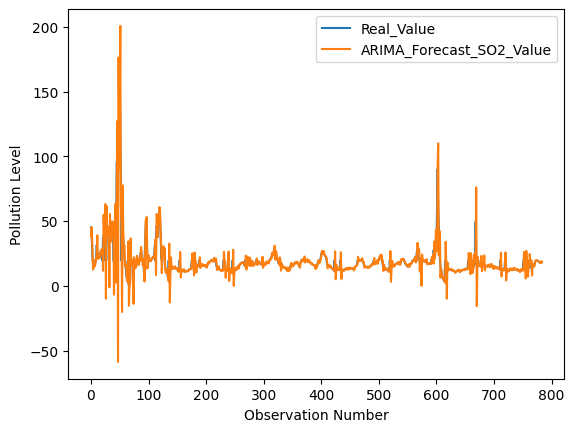

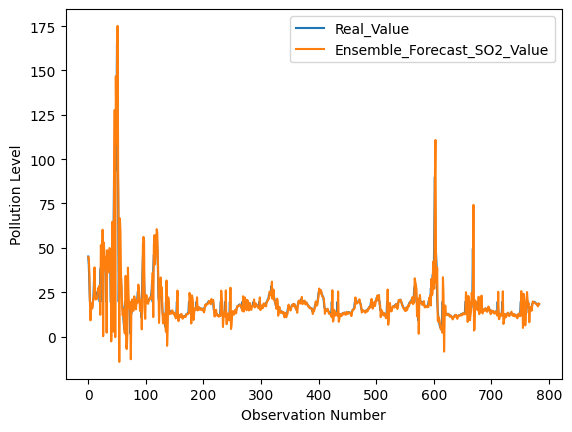

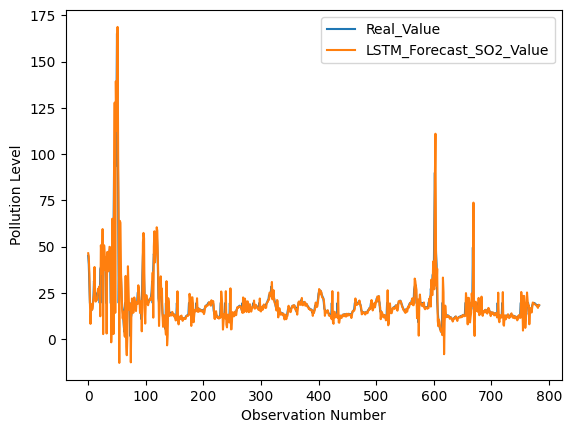

In [11]:
Jan21SO2_predict_Valid_df.columns = ['ARIMA_Forecast_SO2_Value']
ARIMA_SO2 = TestySO2_Value.join(Jan21SO2_predict_Valid_df)

fig_ARIMA_SO2 = ARIMA_SO2.plot(xlabel="Observation Number", ylabel= 'Pollution Level').figure
fig_ARIMA_SO2.savefig('ARIMA_SO2.jpeg')

fig_Ensemble_SO2 = Ensemble_SO2.plot(xlabel="Observation Number", ylabel= 'Pollution Level').figure
fig_Ensemble_SO2.savefig('Ensemble_SO2.jpeg')

fig_LSTM_SO2 = LSTM_SO2.plot(xlabel="Observation Number", ylabel= 'Pollution Level').figure
fig_LSTM_SO2.savefig('LSTM_SO2.jpeg')